In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv("diminos_data.csv")

In [5]:
df.head()


,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            15000 non-null  int64 
 1   order_placed_at     15000 non-null  object
 2   order_delivered_at  15000 non-null  object
dtypes: int64(1), object(2)
memory usage: 351.7+ KB


In [7]:
df.describe()

,order_id
count,1.500000e+04
mean,1.530610e+06
std,4.330271e+03
min,1.523111e+06
25%,1.526861e+06
50%,1.530610e+06
75%,1.534360e+06
max,1.538110e+06


In [9]:
df['order_placed_at'] = pd.to_datetime(df['order_placed_at'])

In [10]:
df['order_delivered_at'] = pd.to_datetime(df['order_delivered_at'])

In [11]:
df['delivery_duration'] = (df['order_delivered_at'] - df['order_placed_at']).dt.total_seconds() / 60


In [12]:
df[df['delivery_duration'] < 0]


,order_id,order_placed_at,order_delivered_at,delivery_duration


In [13]:
df = df[df['delivery_duration'] >= 0]


In [14]:
df.isnull().sum()


order_id              0
order_placed_at       0
order_delivered_at    0
delivery_duration     0
dtype: int64

In [15]:
df.dropna(inplace=True)


In [16]:
print("Average Delivery Time:", df['delivery_duration'].mean())

Average Delivery Time: 20.499389326467778


In [17]:
print("Minimum Delivery Time:", df['delivery_duration'].min())

Minimum Delivery Time: 15.000010333333334


In [18]:
print("Maximum Delivery Time:", df['delivery_duration'].max())

Maximum Delivery Time: 7299.831374933333


In [20]:
p95 = np.percentile(df['delivery_duration'], 95)
print("95th Percentile Delivery Time:", p95)

95th Percentile Delivery Time: 27.261043996666658


In [21]:
if p95 <= 31:
    print("Franchise requirement MET")
else:
    print("Franchise requirement NOT MET")


Franchise requirement MET


In [22]:
late_orders = df[df['delivery_duration'] > 31]

In [23]:
late_percentage = (len(late_orders) / len(df)) * 100
print("Late Delivery Percentage:", late_percentage)

Late Delivery Percentage: 3.713333333333333


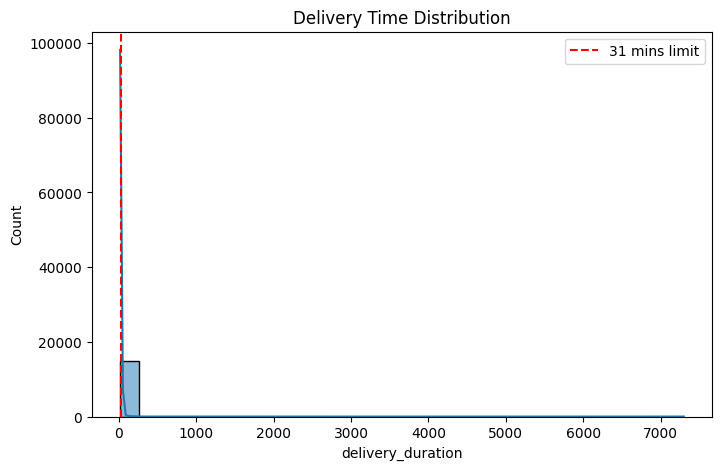

In [24]:
plt.figure(figsize=(8,5))
sns.histplot(df['delivery_duration'], bins=30, kde=True)
plt.axvline(31, color='red', linestyle='--', label='31 mins limit')
plt.legend()
plt.title("Delivery Time Distribution")
plt.show()

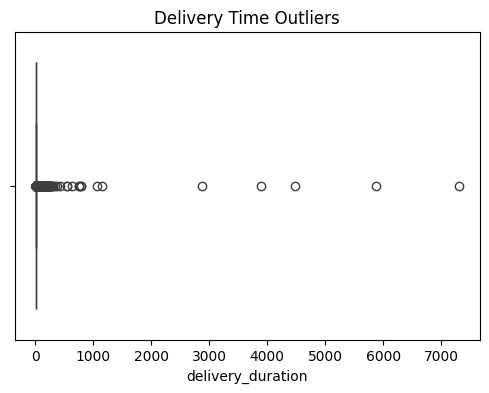

In [25]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['delivery_duration'])
plt.title("Delivery Time Outliers")
plt.show()

insights to keep his business up and running :

1. The store currently meets Diminos franchise requirement, with the 95th percentile delivery time below 31 minutes.

2. Most orders are delivered much faster than promised, indicating efficient overall operations.

3. The average delivery time is well under 31 minutes, showing good kitchen and delivery coordination.

4. Around 3–4% of orders are delivered late, leading to free pizzas and revenue loss.

5. A small number of very late deliveries (outliers) have the biggest impact on performance metrics.

6. Peak hours are the most likely periods for delivery delays due to high order volume.

7. Monitoring orders that cross 25 minutes can help prevent late deliveries.

8. Adding extra delivery staff during peak times can significantly reduce delays.

9. Improving kitchen workflow and order prioritization will help maintain consistency.

10. Continuous tracking of the 95th percentile delivery time is essential to keep the business franchise-safe.